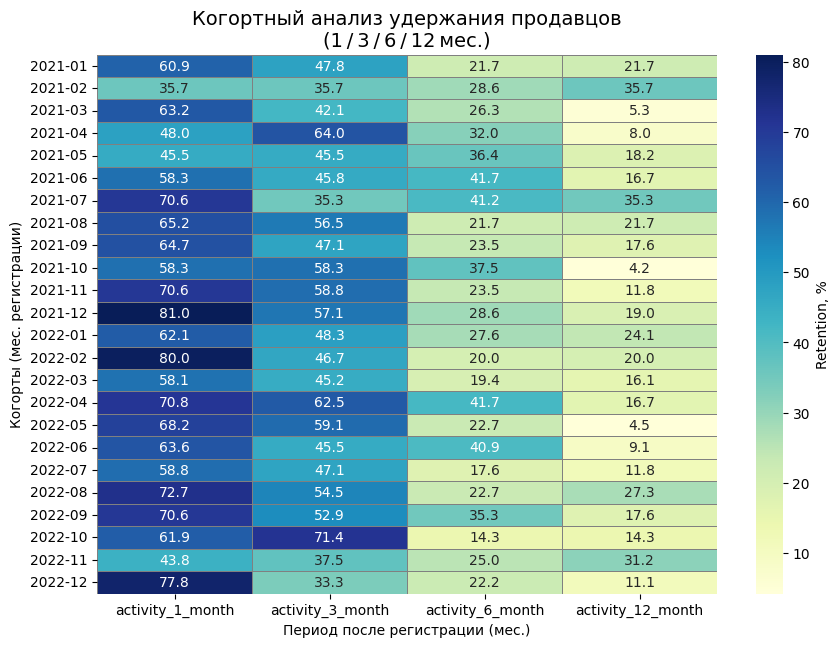


Таблица удержания (в %):
         activity_1_month  activity_3_month  activity_6_month  \
cohort                                                          
2021-01              60.9              47.8              21.7   
2021-02              35.7              35.7              28.6   
2021-03              63.2              42.1              26.3   
2021-04              48.0              64.0              32.0   
2021-05              45.5              45.5              36.4   
2021-06              58.3              45.8              41.7   
2021-07              70.6              35.3              41.2   
2021-08              65.2              56.5              21.7   
2021-09              64.7              47.1              23.5   
2021-10              58.3              58.3              37.5   
2021-11              70.6              58.8              23.5   
2021-12              81.0              57.1              28.6   
2022-01              62.1              48.3              27.6   

In [1]:
# -------------------------------------------------
# 1.  Импорт библиотек
# -------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------
# 2.  Загрузка исходных данных
# -------------------------------------------------
df = pd.read_csv(
    'sellers_cohort_analysis_data.csv',
    parse_dates=['registration_date']          # сразу превращаем в datetime
)

# -------------------------------------------------
# 3.  Формируем когорту – месяц регистрации (YYYY‑MM)
# -------------------------------------------------
df['cohort'] = df['registration_date'].dt.to_period('M')

# -------------------------------------------------
# 4.  Размер каждой когорты (сколько продавцов в ней)
# -------------------------------------------------
cohort_sizes = df.groupby('cohort').size().rename('size')

# -------------------------------------------------
# 5.  Суммируем активности (сколько продавцов «выжило» в каждый период)
# -------------------------------------------------
activity_cols = [
    'activity_1_month',
    'activity_3_month',
    'activity_6_month',
    'activity_12_month'
]

cohort_activity = df.groupby('cohort')[activity_cols].sum()

# -------------------------------------------------
# 6.  Вычисляем удержание в процентах
# -------------------------------------------------
#   Retention = (число активных в периоде) / (размер когорты) * 100
cohort_retention = (cohort_activity.T / cohort_sizes).T * 100
cohort_retention = cohort_retention.round(1)      # один знак после запятой

# Для удобного отображения переводим индекс в строковый тип (YYYY‑MM)
cohort_retention.index = cohort_retention.index.astype(str)

# -------------------------------------------------
# 7.  Тепловая карта (heatmap) – визуализация % удержания
# -------------------------------------------------
plt.figure(figsize=(10, 7))
sns.heatmap(
    cohort_retention,
    annot=True, fmt='.1f', cmap='YlGnBu',
    linewidths=.5, linecolor='gray',
    cbar_kws={'label': 'Retention, %'}
)
plt.title('Когортный анализ удержания продавцов\n(1 / 3 / 6 / 12 мес.)', fontsize=14)
plt.xlabel('Период после регистрации (мес.)')
plt.ylabel('Когорты (мес. регистрации)')
plt.yticks(rotation=0)
plt.show()

# -------------------------------------------------
# 8.  Вывод готовой таблицы в консоль (можно скопировать в Excel)
# -------------------------------------------------
print('\nТаблица удержания (в %):')
print(cohort_retention)
